<a href="https://colab.research.google.com/github/Frazanhibriz/Machine-Learning/blob/main/Supervised%20ML/GDGoC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

In [2]:
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/Dataset/gdgoc-telu-ml-challenge/train.csv'

df = pd.read_csv(path)

df.head(10)

Mounted at /content/drive


,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0
5,6,Niu,684.0,Spain,Female,38.0,3,134168.50,3,Yes,No,3966.50,Yes,5,DIAMOND,888,1
6,7,Foley,659.0,Spain,Male,NaN,3,107594.11,2,Yes,Yes,102416.84,No,3,DIAMOND,683,0
7,8,Khan,645.0,France,Male,39.0,8,0.00,2,No,No,96864.36,No,5,SILVER,287,0
8,9,Iweobiegbunam,610.0,Germany,Female,69.0,5,86038.21,3,No,No,192743.06,Yes,1,DIAMOND,613,1
9,10,Hsiung,488.0,Germany,Female,33.0,4,140002.35,1,Yes,No,123613.81,No,1,GOLD,935,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [4]:
cols_to_remove = ['ID', 'Surname']
df.drop(cols_to_remove, axis=1, inplace=True, errors='ignore')

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0
5,684.0,Spain,Female,38.0,3,134168.50,3,Yes,No,3966.50,Yes,5,DIAMOND,888,1
6,659.0,Spain,Male,NaN,3,107594.11,2,Yes,Yes,102416.84,No,3,DIAMOND,683,0
7,645.0,France,Male,39.0,8,0.00,2,No,No,96864.36,No,5,SILVER,287,0
8,610.0,Germany,Female,69.0,5,86038.21,3,No,No,192743.06,Yes,1,DIAMOND,613,1
9,488.0,Germany,Female,33.0,4,140002.35,1,Yes,No,123613.81,No,1,GOLD,935,0


In [5]:
df.isnull().sum()

,0
CreditScore,427
Geography,0
Gender,423
Age,442
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,402
EstimatedSalary,366


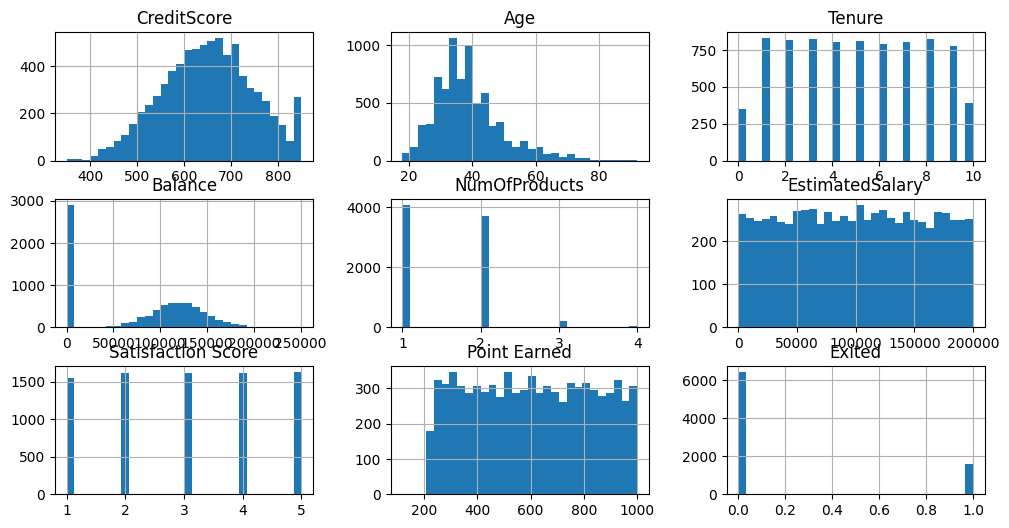

In [6]:
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [7]:
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].median())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Missing')

df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


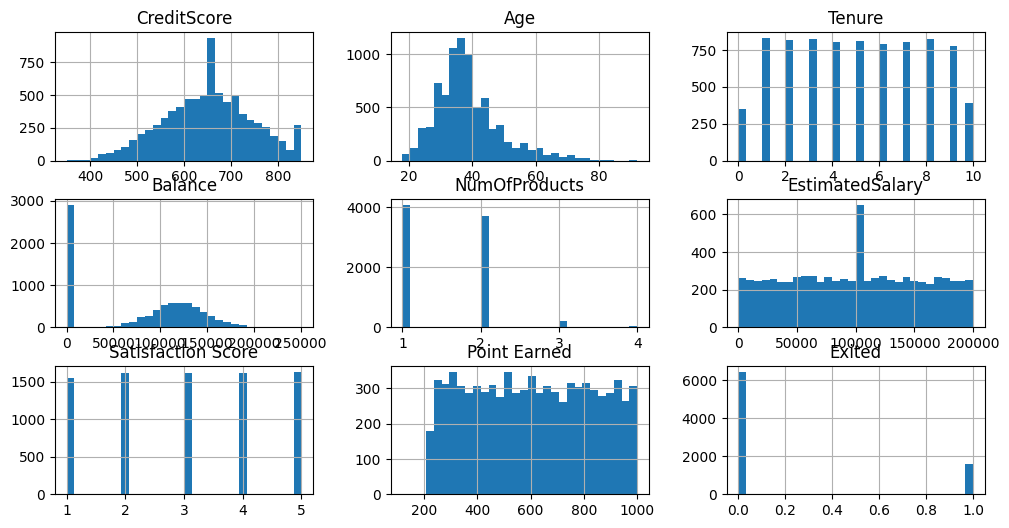

In [8]:
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [9]:
df.duplicated().sum()

30

In [10]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

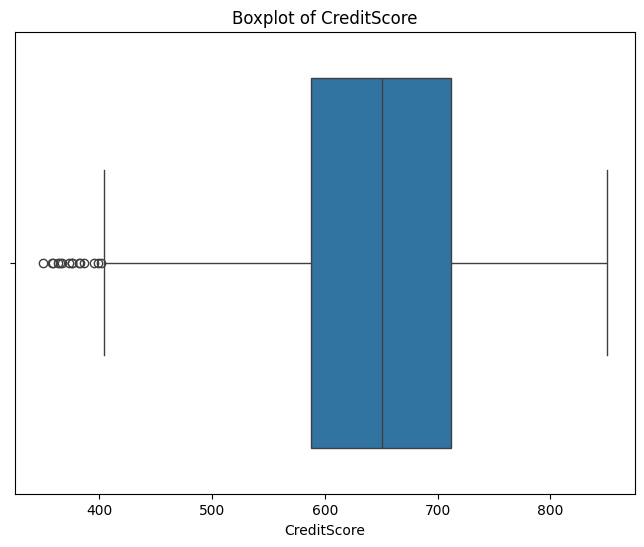

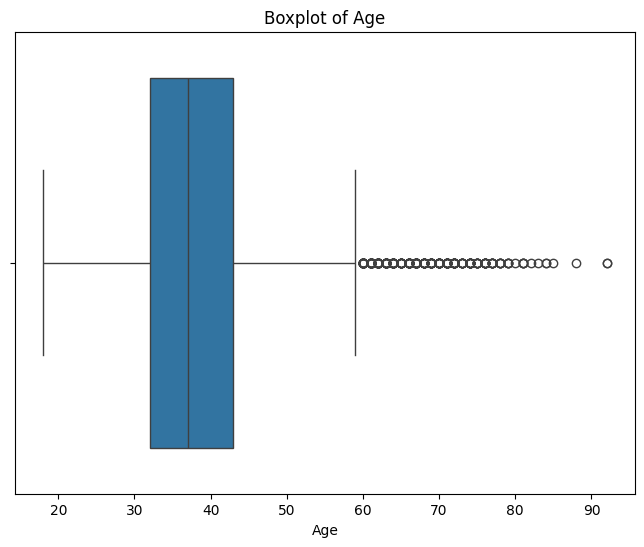

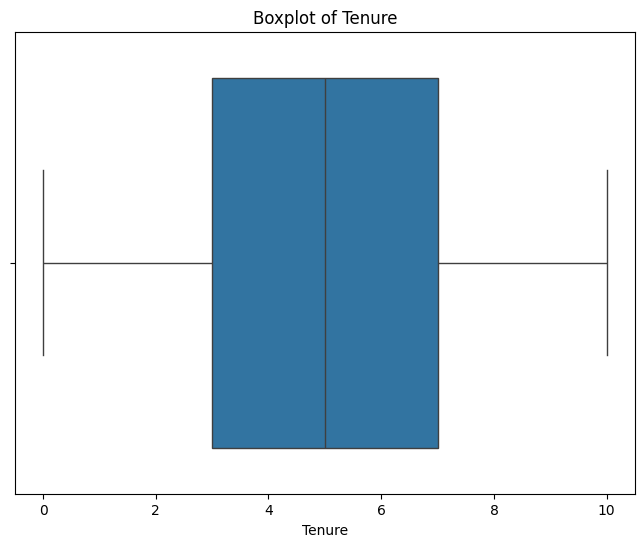

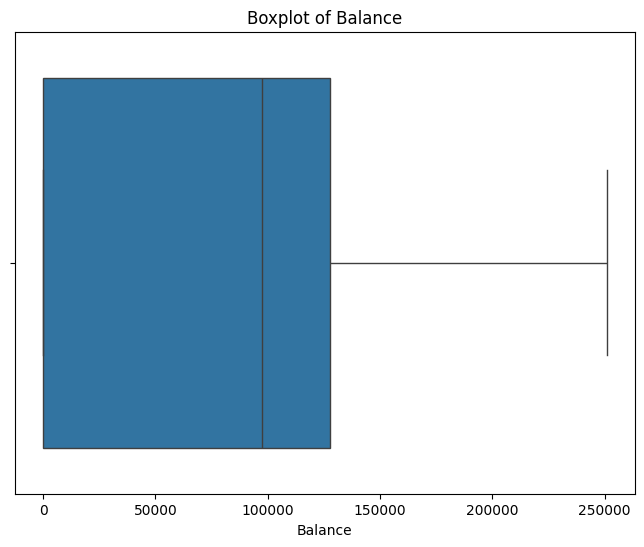

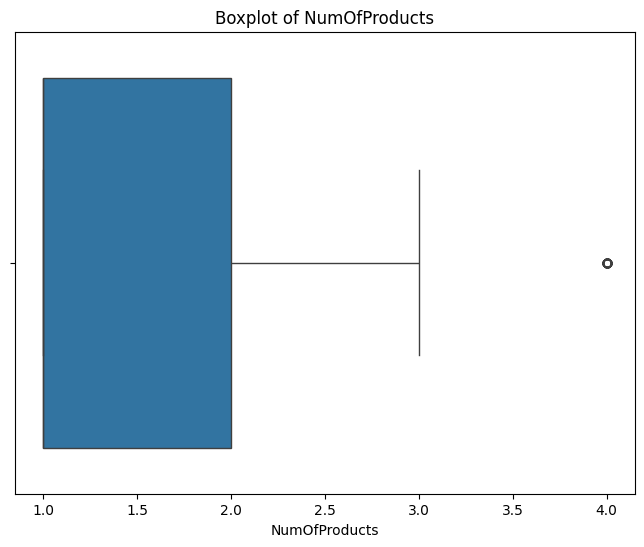

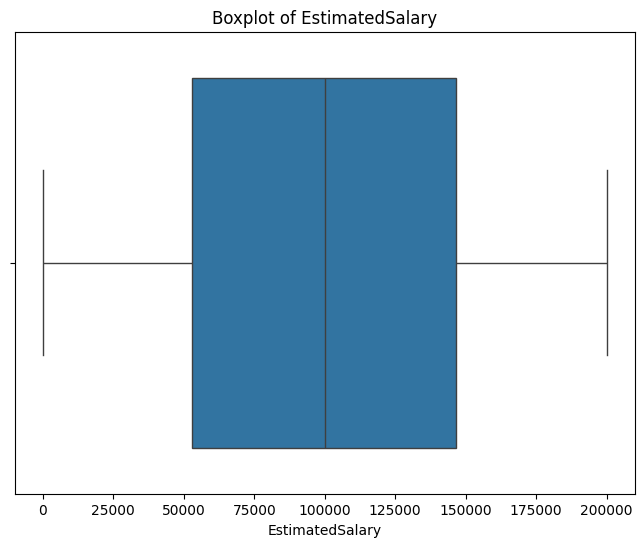

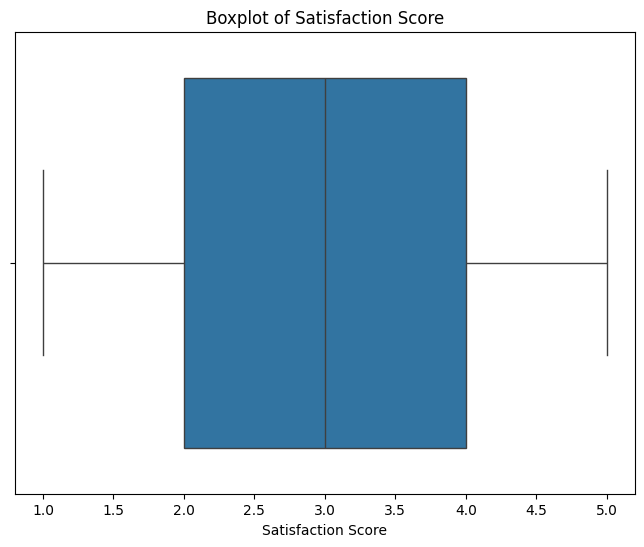

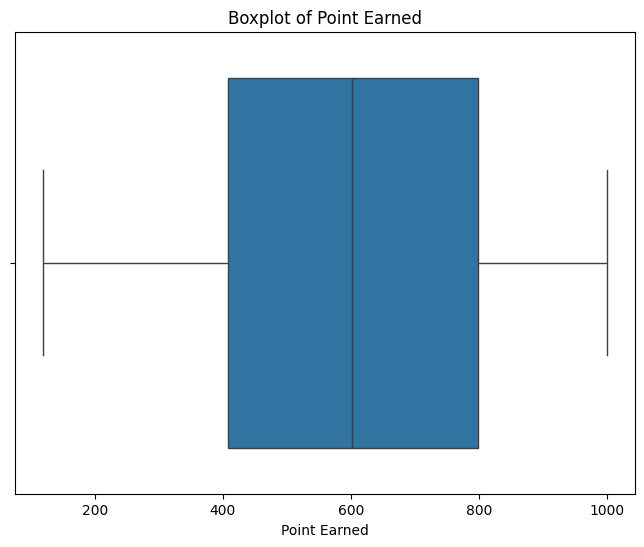

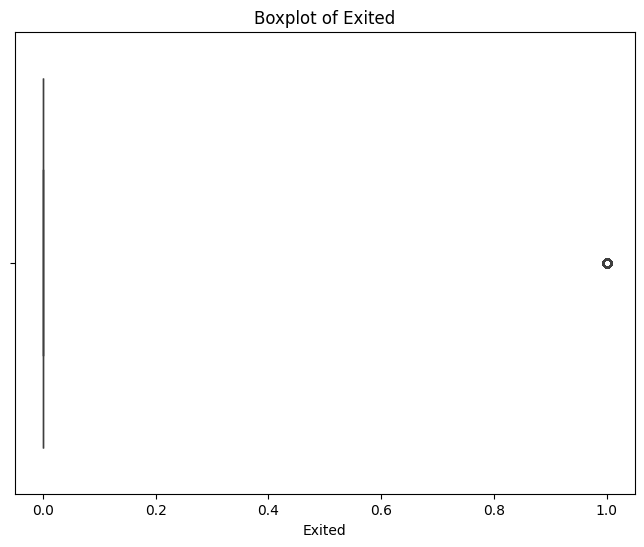

In [11]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    print()
    plt.show()

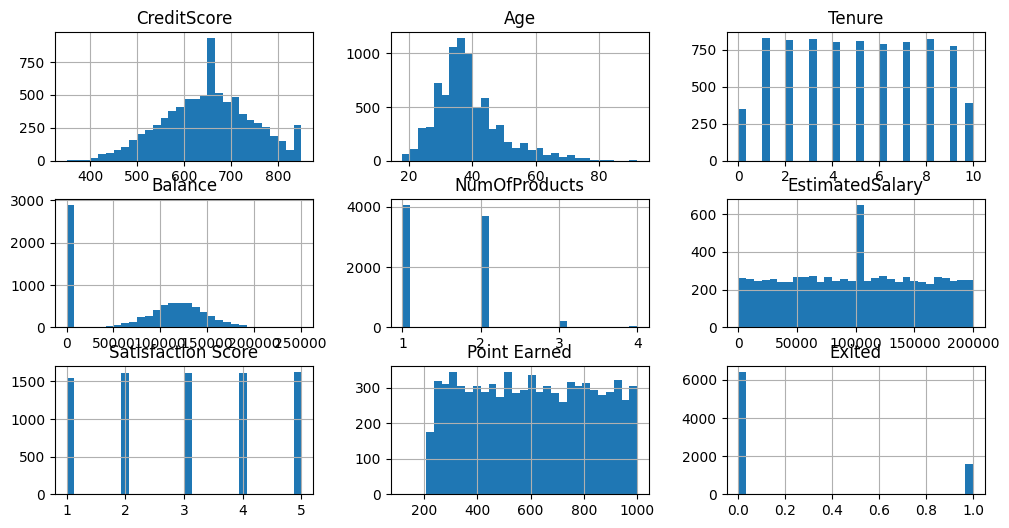

In [12]:
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

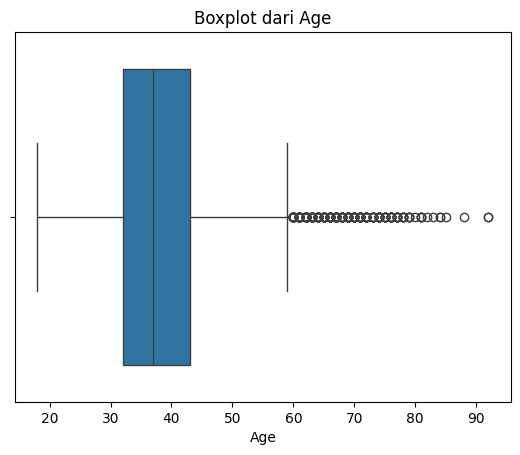

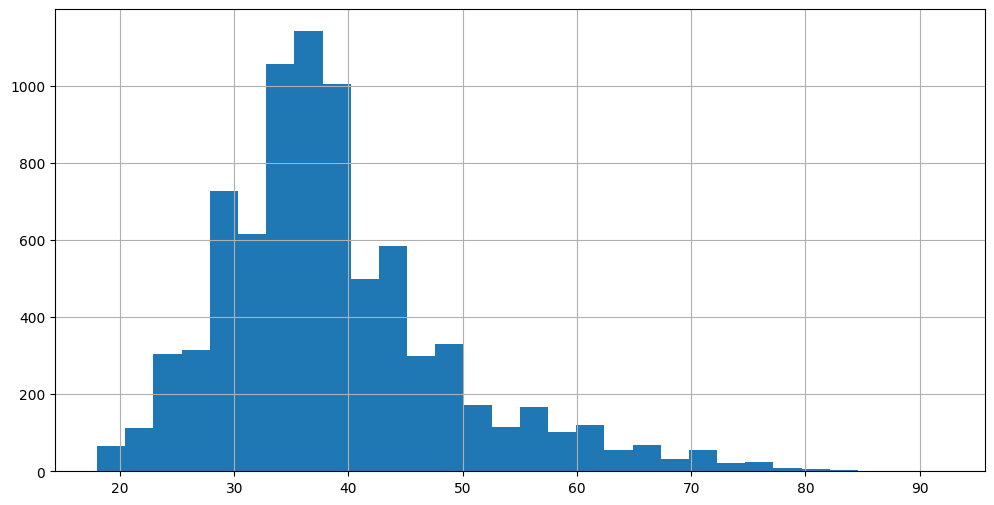

,Age
count,8000.000000
mean,38.735750
std,10.274781
min,18.000000
25%,32.000000
50%,37.000000
75%,43.000000
max,92.000000


In [13]:
sns.boxplot(x='Age', data=df)
plt.title('Boxplot dari Age')
plt.show()
print()
df['Age'].hist(bins=30, figsize=(12, 6))
plt.show()
print()
df['Age'].describe()

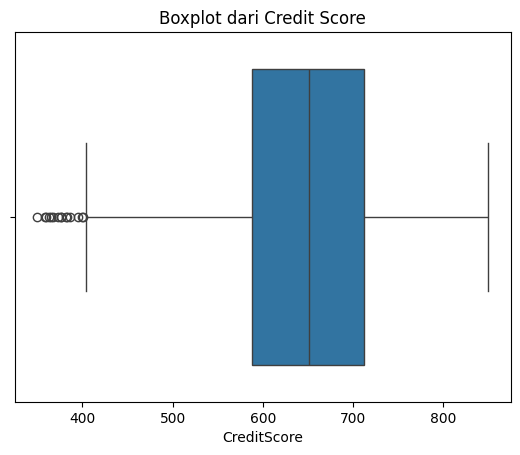

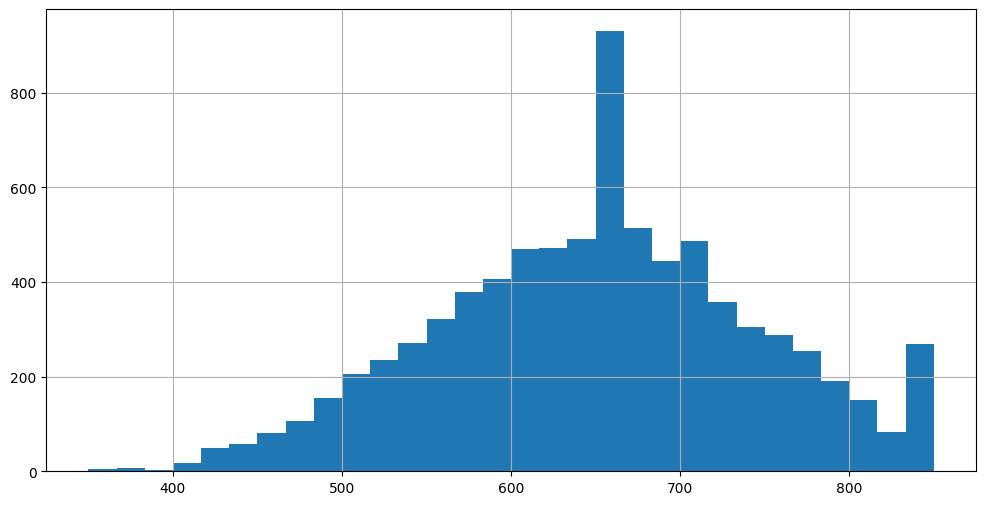

,CreditScore
count,8000.000000
mean,650.647750
std,94.033679
min,350.000000
25%,588.000000
50%,651.000000
75%,712.000000
max,850.000000


In [14]:
sns.boxplot(x='CreditScore', data=df)
plt.title('Boxplot dari Credit Score')
plt.show()
print()
df['CreditScore'].hist(bins=30, figsize=(12, 6))
plt.show()
print()
df['CreditScore'].describe()

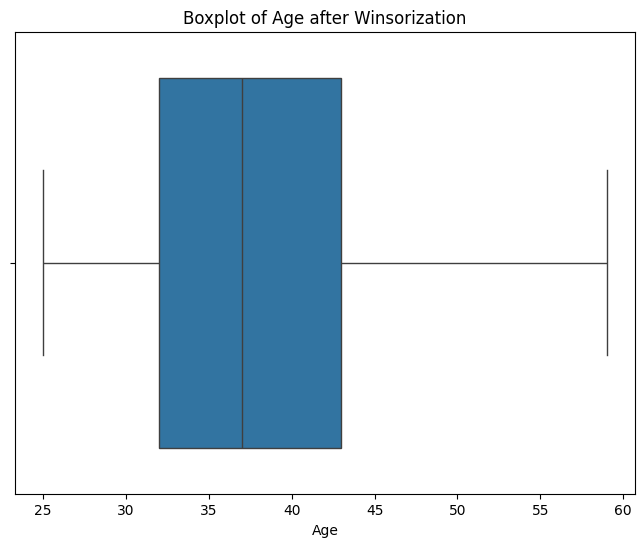

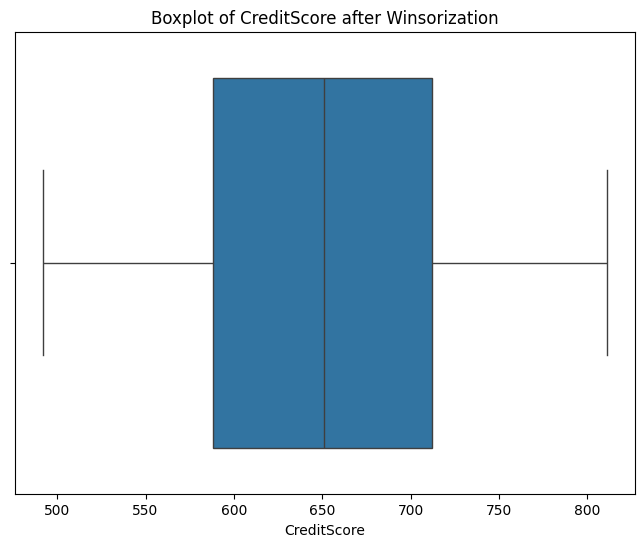

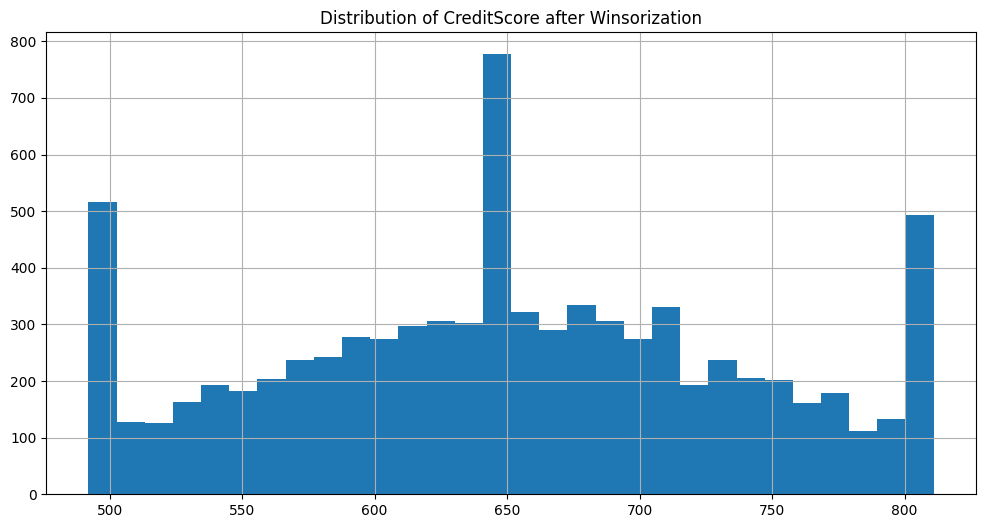

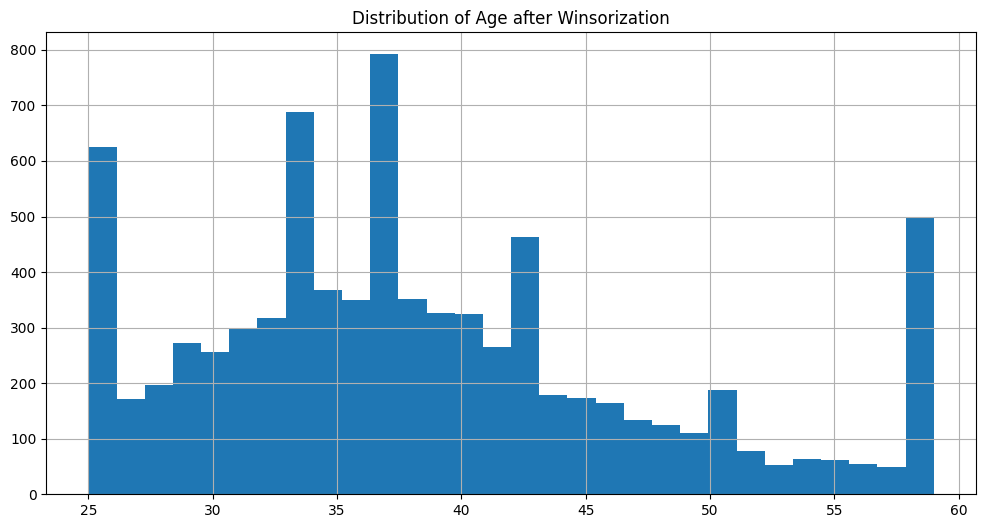

In [15]:
num_cols = ['Age', 'CreditScore']
for col in num_cols:
  df[col] = winsorize(df[col], limits=[0.05, 0.05])

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after Winsorization')
    plt.show()
    print()

df['CreditScore'].hist(bins=30, figsize=(12, 6))
plt.title('Distribution of CreditScore after Winsorization')
plt.show()
print()
df['Age'].hist(bins=30, figsize=(12, 6))
plt.title('Distribution of Age after Winsorization')
plt.show()

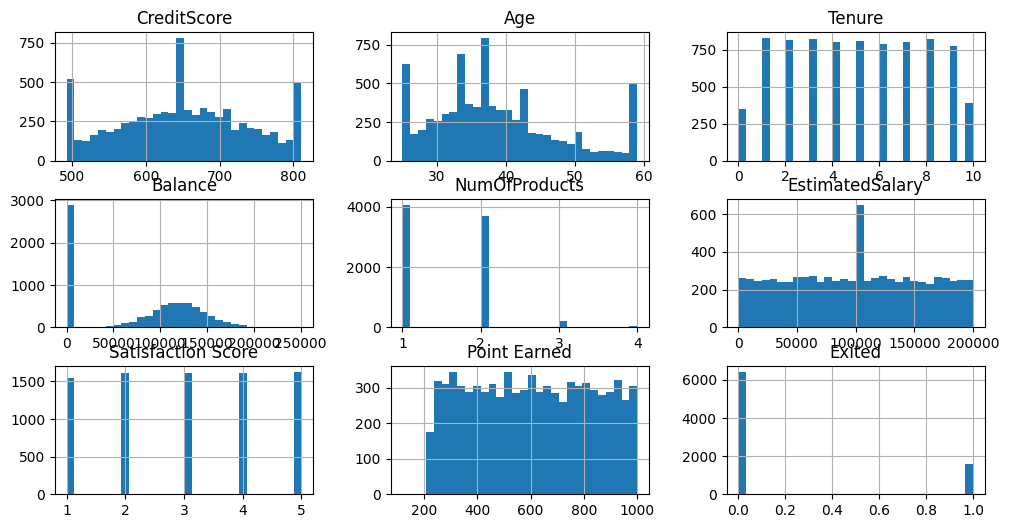

In [16]:
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

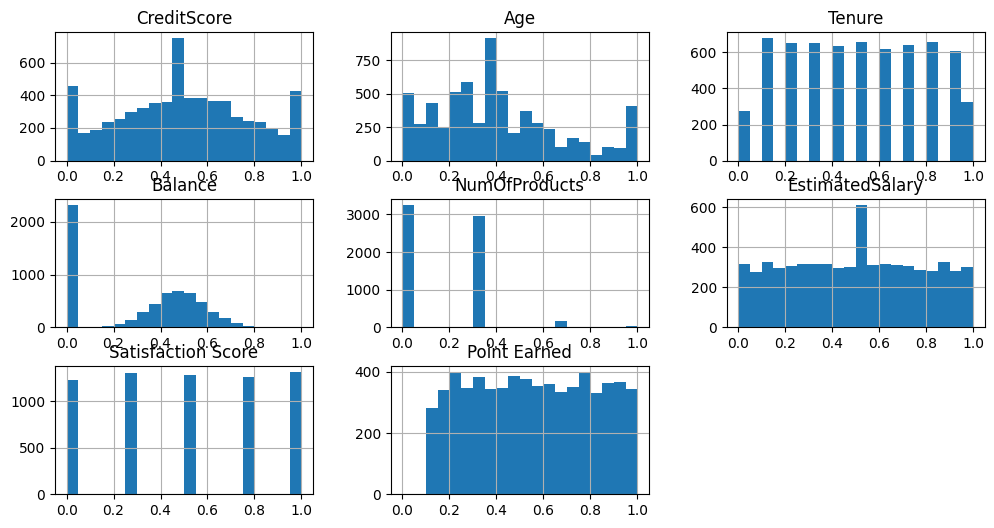

In [18]:
num_cols = X_train.select_dtypes(include=['number']).columns
num_cols = X_val.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

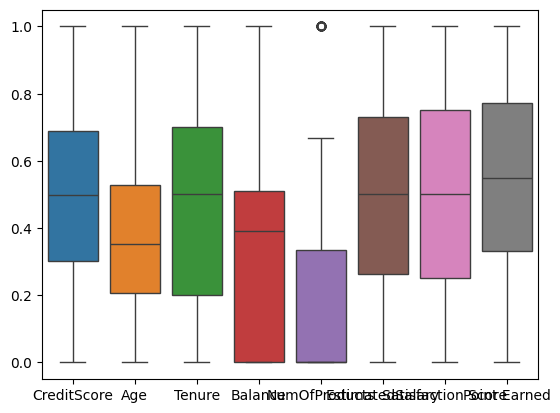

In [19]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [20]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
Geography
France     3161
Germany    1630
Spain      1609
Name: count, dtype: int64
--------------------------------------------------
Gender
Male       3280
Female     2768
Missing     352
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    4553
No     1847
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes        3143
No         2942
Missing     315
Name: count, dtype: int64
--------------------------------------------------
Complain
No     5118
Yes    1282
Name: count, dtype: int64
--------------------------------------------------
Card Type
DIAMOND     1613
PLATINUM    1608
GOLD        1602
SILVER      1577
Name: count, dtype: int64
--------------------------------------------------


In [21]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

X_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Gender_Missing,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes,Complain_Yes,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
1467,0.156740,0.294118,0.2,0.697074,0.000000,0.111181,0.75,0.296254,False,True,True,False,True,False,True,False,False,False,False
5768,0.576803,0.352941,0.8,0.000000,0.333333,0.668410,0.25,0.845630,False,False,True,False,True,False,True,False,False,False,False
5714,0.498433,0.147059,0.5,0.000000,0.333333,0.378703,0.00,0.396141,False,False,True,False,True,True,False,False,False,True,False
1578,0.956113,0.882353,1.0,0.000000,1.000000,0.246785,0.00,0.146425,False,False,False,False,True,False,True,True,True,False,False
6958,0.068966,0.352941,0.9,0.000000,0.333333,0.070756,1.00,0.299659,False,True,True,False,True,False,True,False,False,True,False
6861,0.608150,0.264706,0.9,0.000000,0.333333,0.637776,0.50,0.271283,False,True,True,False,True,True,False,False,False,False,True
2126,0.416928,0.176471,0.8,0.000000,0.333333,0.759218,0.25,0.565267,False,True,False,False,True,True,False,False,False,False,True
6202,0.498433,0.235294,0.5,0.000000,0.333333,0.393270,1.00,1.000000,False,False,True,False,False,False,True,False,True,False,False
1450,0.410658,0.235294,0.2,0.318864,0.000000,0.520254,0.25,0.254257,True,False,True,False,True,False,True,False,False,False,False
5067,0.636364,0.323529,0.4,0.643819,0.000000,0.504551,0.25,0.715096,False,False,True,False,True,True,False,False,True,False,False


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 1467 to 7270
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         6400 non-null   float64
 1   Age                 6400 non-null   float64
 2   Tenure              6400 non-null   float64
 3   Balance             6400 non-null   float64
 4   NumOfProducts       6400 non-null   float64
 5   EstimatedSalary     6400 non-null   float64
 6   Satisfaction Score  6400 non-null   float64
 7   Point Earned        6400 non-null   float64
 8   Geography_Germany   6400 non-null   bool   
 9   Geography_Spain     6400 non-null   bool   
 10  Gender_Male         6400 non-null   bool   
 11  Gender_Missing      6400 non-null   bool   
 12  HasCrCard_Yes       6400 non-null   bool   
 13  IsActiveMember_No   6400 non-null   bool   
 14  IsActiveMember_Yes  6400 non-null   bool   
 15  Complain_Yes        6400 non-null   bool   
 16  Card Typ

In [23]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6400 entries, 1467 to 7270
Series name: Exited
Non-Null Count  Dtype
--------------  -----
6400 non-null   int64
dtypes: int64(1)
memory usage: 100.0 KB


In [24]:
# Inisialisasi model XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Untuk klasifikasi biner
    eval_metric=['logloss', 'auc', 'error'],  # Metrik evaluasi
    max_depth=3,  # Kedalaman pohon maksimum
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Jumlah pohon
    random_state=42  # Random seed
)

# Melatih model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'auc', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
# Melakukan prediksi
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilitas kelas positif

# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
logloss = log_loss(y_val, y_pred_proba)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.9988
ROC-AUC: 0.9994
Log Loss: 0.0087


In [26]:
path = '/content/drive/My Drive/Dataset/gdgoc-telu-ml-challenge/test.csv'

df_new = pd.read_csv(path)

df_new.head(10)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433
5,2006,Degtyaryov,616,Germany,Female,42,6,117899.95,2,No,No,150266.81,No,3,PLATINUM,653
6,2007,Palerma,686,France,Female,41,7,152105.57,2,No,Yes,132374.41,No,1,SILVER,665
7,2008,Smith,658,France,Male,29,4,80262.60,1,Yes,Yes,20612.82,No,2,GOLD,420
8,2009,Marino,545,France,Male,23,2,0.00,2,Yes,No,189613.12,No,5,SILVER,322
9,2010,Pai,639,Germany,Male,38,5,130170.82,1,Yes,Yes,149599.62,No,4,GOLD,577


In [27]:
ID_cols = df_new['ID']
Surname_cols = df_new['Surname']

In [28]:
df_new.drop(['ID', 'Surname'], axis=1, inplace=True, errors='ignore')

df_new.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433
5,616,Germany,Female,42,6,117899.95,2,No,No,150266.81,No,3,PLATINUM,653
6,686,France,Female,41,7,152105.57,2,No,Yes,132374.41,No,1,SILVER,665
7,658,France,Male,29,4,80262.60,1,Yes,Yes,20612.82,No,2,GOLD,420
8,545,France,Male,23,2,0.00,2,Yes,No,189613.12,No,5,SILVER,322
9,639,Germany,Male,38,5,130170.82,1,Yes,Yes,149599.62,No,4,GOLD,577


In [29]:
df_new.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [30]:
df_new.duplicated().sum()

0

In [31]:
num_cols = df_new.select_dtypes(include=['number']).columns
categorical_cols = df_new.select_dtypes(include=['object']).columns

In [32]:
num_cols = ['Age', 'CreditScore']
for col in num_cols:
    df_new[col] = winsorize(df_new[col], limits=[0.05, 0.05])

In [33]:
num_cols = df_new.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()  # Gunakan scaler yang sama dengan data training
df_new[num_cols] = scaler.fit_transform(df_new[num_cols])

In [34]:
categorical_cols = df_new.select_dtypes(include=['object']).columns
df_new = pd.get_dummies(df_new, columns=categorical_cols, drop_first=True)

In [35]:
missing_cols = set(X_train.columns) - set(df_new.columns)
for col in missing_cols:
    df_new[col] = 0  # Isi dengan 0 untuk kolom yang hilang
# Urutkan kolom agar sama dengan data training
df_new = df_new[X_train.columns]

In [36]:
y_pred_new = model.predict(df_new)

# Create predictions_df from y_pred_new
predictions_df = pd.DataFrame({'ID': ID_cols, 'Exited': y_pred_new}) # Assuming 'ID' is the index

predictions_df.to_csv('predictions.csv', index=False)

In [37]:
path = '/content/predictions.csv'

df_new = pd.read_csv(path)

df_new.head(15)

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
5,2006,0
6,2007,0
7,2008,0
8,2009,0
9,2010,0
